In [1]:
from data_processor import *
from global_variables import *
import matplotlib.pyplot as plt
if not os.path.exists('pics/'):
    os.makedirs('pics/')

### A City's Monthly Average Temperature of a Whole Year

In [2]:
# Parameter
city = 'KSAN'
year = 2018
fname = 'pics/{}/temperature/y{}_plot.jpg'.format(city,year)
if not os.path.exists('pics/{}/temperature/'.format(city)):
    os.makedirs('pics/{}/temperature/'.format(city))
# Code
monthly_avg_temp_list = []
for month in range(1,13):
    month_start, month_end = get_monthly_start_end(year=year, month=month)
    weather_info = get_info(city,month_start, month_end, info_type='temperature', output=False)
    monthly_avg_temp_list.append(weather_info['mean'])
print(monthly_avg_temp_list)
year_start, year_end = get_yearly_start_end(year=year)
weather_info = get_info(city,year_start, year_end, info_type='temperature', output=False)
yearly_avg_temp_list = list([weather_info['mean'] for i in range(12)])
print(yearly_avg_temp_list)

[61.70967741935484, 59.642857142857146, 61.064516129032256, 63.8, 63.87096774193548, 67.76666666666667, 75.2258064516129, 78.35483870967742, 72.13333333333334, 69.45161290322581, 65.83333333333333, 59.483870967741936]
[66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342]


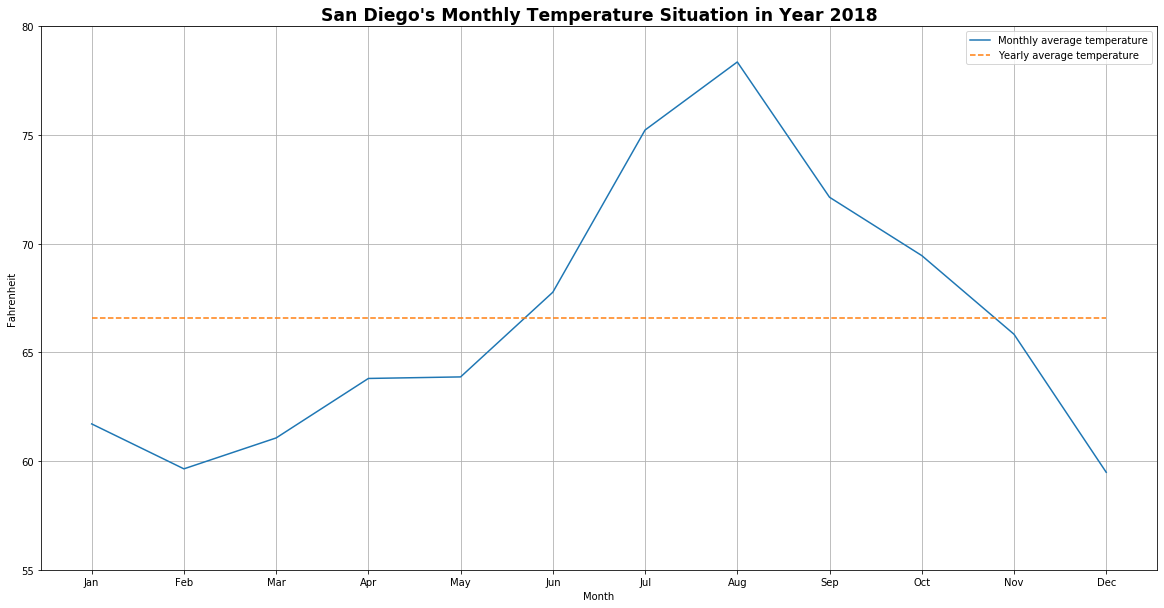

In [6]:
# Plot
plt.figure(figsize=(20,10))
plt.plot(range(12), monthly_avg_temp_list)
plt.plot(range(12), yearly_avg_temp_list, '--')
title_str = '{}\'s Monthly Temperature Situation in Year {}'.format(code_city_refer[city], year)
plt.xlabel('Month')
plt.xticks(range(12),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('Fahrenheit')
plt.ylim([55,80])
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.legend(['Monthly average temperature','Yearly average temperature'])
plt.grid()
#plt.savefig(fname)
plt.show()

### A City's Average Temperature of a Specific Month in All Years (1990 - 2019)

In [7]:
# Parameter
city = 'KSAN'
month = 3
fname = 'pics/{}/temperature/m{}_plot.jpg'.format(city,month)
if not os.path.exists('pics/{}/temperature/'.format(city)):
    os.makedirs('pics/{}/temperature/'.format(city))
# Code
start_year = 1990
end_year = 2019
if month > 4:
    end_year = 2018
monthly_avg_temp_list = []
yearly_avg_temp_list = []
for year in range(start_year, end_year + 1):
    month_start, month_end = get_monthly_start_end(year=year, month=month)
    weather_info = get_info(city,month_start, month_end, info_type='temperature', output=False)
    monthly_avg_temp_list.append(weather_info['mean'])
    year_start, year_end = get_yearly_start_end(year=year)
    weather_info = get_info(city,year_start, year_end, info_type='temperature', output=False)
    yearly_avg_temp_list.append(weather_info['mean'])
print(monthly_avg_temp_list)

[58.225806451612904, 56.32258064516129, 59.87096774193548, 60.87096774193548, 60.12903225806452, 60.096774193548384, 59.58064516129032, 61.25806451612903, 59.03225806451613, 57.935483870967744, 57.645161290322584, 58.54838709677419, 57.193548387096776, 59.774193548387096, 62.193548387096776, 60.354838709677416, 57.16129032258065, 60.193548387096776, 59.16129032258065, 59.74193548387097, 60.61290322580645, 61.096774193548384, 58.516129032258064, 60.354838709677416, 64.41935483870968, 66.45161290322581, 63.0, 62.935483870967744, 61.064516129032256, 60.87096774193548]


ValueError: Format 'jpg' is not supported (supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz)

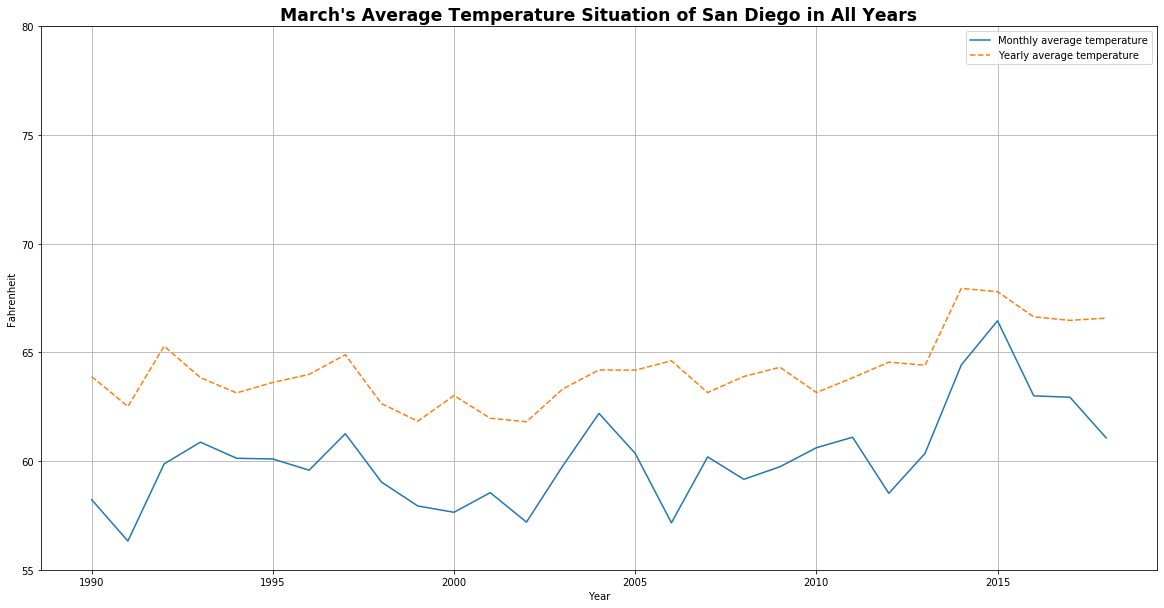

In [10]:
# plot
plt.figure(figsize=(20,10))
plt.plot(range(start_year, end_year), monthly_avg_temp_list[:-1])
plt.plot(range(start_year, end_year), yearly_avg_temp_list[:-1], '--')
title_str = '{}\'s Average Temperature Situation of {} in All Years'.format(get_month_str(month), code_city_refer[city])
plt.xlabel('Year')
plt.ylim([1990,2019])
plt.ylabel('Fahrenheit')
plt.ylim([55,80])
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.legend(['Monthly average temperature','Yearly average temperature'])
plt.grid()
# plt.savefig(fname)
plt.show()

### A City's Yearly Average Temperature in All Years (1990 - 2018)

In [ ]:
# Parameter
city = 'KSAN'
fname = 'pics/{}/temperature/all_plot.jpg'.format(city,month)
# Code
start_year = 1990
end_year = 2019
yearly_avg_temp_list = []
for year in range(start_year, end_year + 1):
    year_start, year_end = get_yearly_start_end(year=year)
    weather_info = get_info(city,year_start, year_end, info_type='temperature', output=False)
    yearly_avg_temp_list.append(weather_info['mean'])
print(yearly_avg_temp_list)

In [ ]:
# plot
plt.figure(figsize=(20,10))
plt.plot(range(start_year, end_year), yearly_avg_temp_list[:-1])
title_str = '{}\'s Yearly Temperature Situation in All years'.format(code_city_refer[city])
plt.xlabel('Year')
plt.ylabel('Fahrenheit')
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.grid()
plt.savefig(fname)
plt.show()

### City's Yearly Average Temperature Comparison (1990 - 2018)

In [ ]:
# Parameter
fname = 'pics/{}_temp_allyears_plot.jpg'.format(city)
# Code
start_year = 1990
end_year = 2018
cities_yearly_avg_temp_dict = dict([(city,[]) for city in city_code_refer.values()])
for city in city_code_refer.values():
    for year in range(start_year, end_year + 1):
        year_start, year_end = get_yearly_start_end(year=year)
        weather_info = get_info(city,year_start, year_end, info_type='temperature', output=False)
        cities_yearly_avg_temp_dict[city].append(weather_info['mean'])
print(cities_yearly_avg_temp_dict)

In [ ]:
# plot
plt.figure(figsize=(20,10))
for city in city_code_refer.values():
    plt.plot(range(start_year, end_year+1), cities_yearly_avg_temp_dict[city])
title_str = 'All Cities\'s Yearly Temperature Situation in All years'
plt.xlabel('Year')
plt.ylabel('Fahrenheit')
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.legend(list(city_code_refer.keys()))
plt.grid()
plt.show()

### A City's Monthly Average Temperature in All Years (1990 - 2018)

In [ ]:
# Parameter
fname = 'pics/{}_temp_allyears_plot.jpg'.format(city)
month = 3
# Code
start_year = 1990
end_year = 2019
if month > 4:
    end_year = 2018
cities_monthly_avg_temp_dict = dict([(city,[]) for city in city_code_refer.values()])
for city in city_code_refer.values():
    for year in range(start_year, end_year + 1):
        month_start, month_end = get_monthly_start_end(year=year, month=month)
        weather_info = get_info(city,month_start, month_end, info_type='temperature', output=False)
        cities_monthly_avg_temp_dict[city].append(weather_info['mean'])
print(cities_monthly_avg_temp_dict)

In [ ]:
# plot
plt.figure(figsize=(20,10))
for city in city_code_refer.values():
    plt.plot(range(start_year, end_year+1), cities_monthly_avg_temp_dict[city])
title_str = 'All Cities\'s Month {}\'s Average Temperature Situation in All years'.format(month)
plt.xlabel('Year')
plt.ylabel('Fahrenheit')
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.legend(list(city_code_refer.keys()))
plt.grid()
plt.show()